In [1]:
import sounddevice as sd
import time
import matplotlib.pyplot as plt
from pylab import *
#Parameters--------------
fs = 48*10**3 #48k

#------------------------
sd.default.samplerate = fs
sd.default.channels = 1

n=12

duration=1.45
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=1)

#error https://github.com/spatialaudio/python-sounddevice/issues/74
#get the /usr/lib/x86_64-linux-gnu/libportaudio.so.2 to /home/aadc/anaconda3/lib/libportaudio.so
#because it was broken

In [2]:
nfft = 1024
def mySpec(sig):
    l = range(0,len(sig)-len(sig)%nfft,nfft)
    a = np.zeros((nfft//2,len(l)))
    #sig = sig-sig.mean()
    for si, s in enumerate(l):
        ss = sig[s:s+nfft].flatten()
        a[:,si] = (np.abs(np.fft.fft(ss)).flatten()/nfft)[:nfft//2] #flatten!!! otherwise it will be done over rows =SSSS
        # fuck that cost me some time =S
    return a
    #plt.imshow((np.log(a)))

<IPython.core.display.Javascript object>


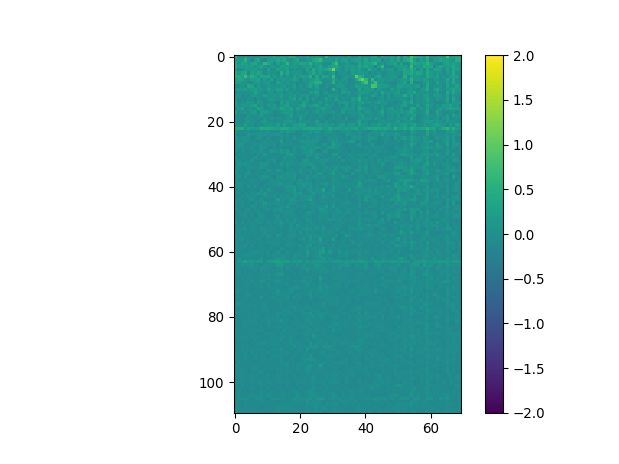

In [20]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# record something
duration = 1.5 #1.45  # seconds
buff_len=1

l,h = 110, int(duration*fs/nfft)
spectra=np.ones((buff_len, l, h))

fig = plt.figure()
img = plt.imshow(spectra.prod(axis=0), vmin=-2,vmax=2,cmap='viridis')
plt.colorbar()

def animate(n):
    sig = sd.rec(int(duration * fs), samplerate=fs, channels=1)
    time.sleep(duration)
    spectrum = mySpec(sig)
    spectrum-=spectrum.mean()
    spectrum/=spectrum.std()
    #spectrum= (np.log(spectrum)+16.6)/2.25
    s = spectrum[20:20+l,:h]
    spectra[n%buff_len]=s
    img.set_data((s)) #spectra.prod(axis=0))
    spectrum.shape
    return img #pay attention--> there is no error message

anim = animation.FuncAnimation(fig, animate, frames=100, repeat=True)

63.28125000000001

<IPython.core.display.Javascript object>


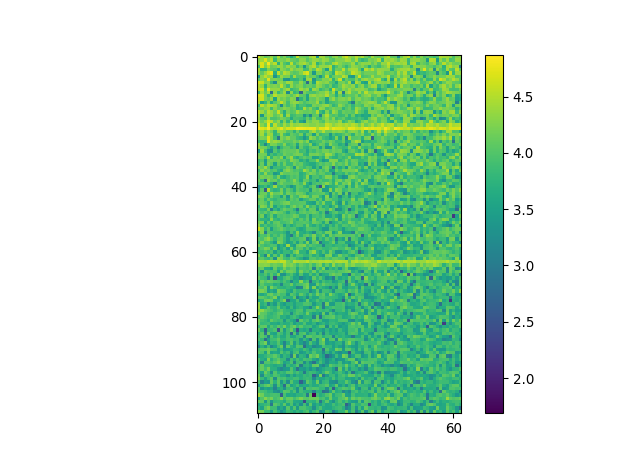

In [17]:
plt.imshow(s)
plt.colorbar()

<IPython.core.display.Javascript object>


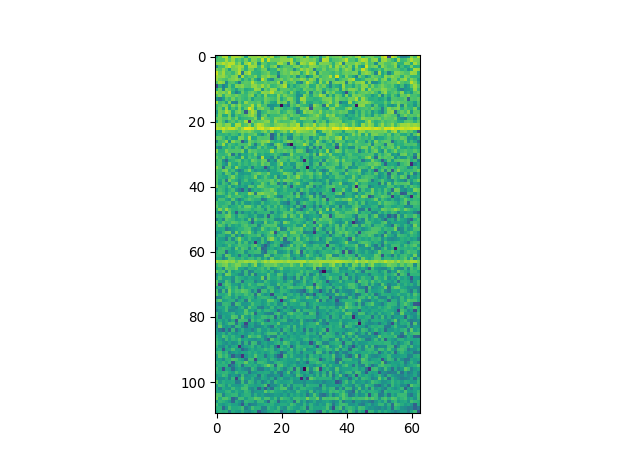

In [9]:
sig = sd.rec(int(duration * fs), samplerate=fs, channels=1)
time.sleep(duration)
spectrum = mySpec(sig)
spectrum= (np.log(spectrum)+16.6)/2.25
#spectra[n%buff_len]=np.log(spectrum[40:130])
plt.imshow((spectrum[20:130])) #spectra.prod(axis=0

In [26]:
duration*fs/nfft

65.625

In [5]:
from sklearn.externals import joblib
clf = joblib.load('alarm_lr_clf.pkl')

In [18]:
duration = 1.46

probas = []
engine = []
for n in range(100):
    sig = sd.rec(int(duration * fs), samplerate=fs, channels=1)
    time.sleep(duration)

    spectrum, freqs, t, im = specgram(sig.flatten(),Fs=fs,NFFT=2**11,scale='dB',noverlap=0)
    freqidx = (freqs>1000)*(freqs<3000)
    X = (np.log(spectrum[freqidx])+16.7)/2.25 #scale
    
    #spectrum = mySpec(sig)
    #X = np.log(spectrum[43:128])
    #X-=X.mean()
    #X/=X.std()
    #X = ()#+16.7)/2.25
    
    #plt.imshow(X)

    prob = clf.predict_proba(X.reshape(1,-1)[:,:2890])[:,1]
    
    # engineering solution:
    a= spectrum[[73, 96, 97, 98, 121, 122]]
    a-=a.mean()
    a/=a.std()
    #plt.plot( a.T )
    b=np.roll(spectrum[[71, 88, 89, 90, 91, 123, 124]], 17,axis=1)
    b-=b.mean()
    b/=b.std()
    c=(a.sum(axis=0)+b.sum(axis=0))
    c-=c.mean()
    c/=c.std()
    d=np.abs(np.convolve(c,np.ones(4)/4) )
    print('lr: {:4.1f}% engineeringSol: {:4.1f}'.format(prob[0]*100, d.max()/100), end='\r')
    probas.append(prob)
    engine.append(d)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


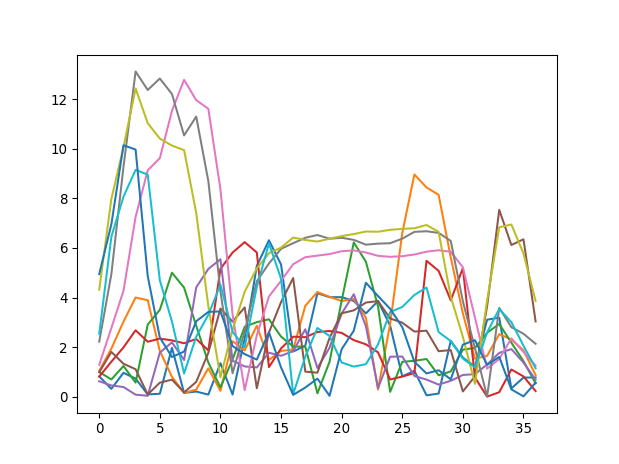

In [17]:
plt.figure()
#lt.plot(engine[0])
plt.plot(np.asarray(engine).T)

In [64]:
43+85

128

In [50]:
probas

[array([[1.59872116e-14, 1.00000000e+00]]),
 array([[9.99979516e-01, 2.04836978e-05]]),
 array([[9.99989583e-01, 1.04168546e-05]]),
 array([[9.99840092e-01, 1.59907675e-04]]),
 array([[5.42537722e-05, 9.99945746e-01]]),
 array([[5.27112597e-06, 9.99994729e-01]]),
 array([[1.00463658e-05, 9.99989954e-01]]),
 array([[6.60275657e-06, 9.99993397e-01]]),
 array([[1.49902853e-05, 9.99985010e-01]]),
 array([[4.51922246e-05, 9.99954808e-01]])]